In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/mitral-valve-phantom-troupe-must/MitralValveCarpentier/TrainVal/III/',
    labels = 'inferred',
    label_mode = 'categorical',
    #label_mode = 'binary',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224,224),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training",)

Found 58624 files belonging to 2 classes.
Using 46900 files for training.


In [3]:
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/mitral-valve-phantom-troupe-must/MitralValveCarpentier/TrainVal/III/',
    labels = 'inferred',
    label_mode = 'categorical',
    #label_mode = 'binary',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224,224),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",)

Found 58624 files belonging to 2 classes.
Using 11724 files for validation.


In [4]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/mitral-valve-phantom-troupe-must/MitralValveCarpentier/Test/III/',
    labels = 'inferred',
    label_mode = 'categorical',
    #label_mode = 'binary',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (224,224),
    shuffle = True,
    seed = 123,)

Found 6236 files belonging to 2 classes.


In [5]:
# define classes name
class_names = ['A4C','PLA']

# **ResNet50**

In [6]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
#import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [7]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1")
])
m.build([None, 224, 224, 3])  # Batch input shape.


In [8]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [10]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model.fit(ds_train, validation_data=ds_validation, epochs=epochs, batch_size=batch_size)

In [11]:
# launch the training
model_history = trainModel(model = model, epochs = 3, optimizer = "Adam")

Epoch 1/3
1466/1466 [==============================] - 193s 122ms/step - loss: 0.0730 - accuracy: 0.9733 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 2/3
1466/1466 [==============================] - 180s 122ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 8.5825e-04 - val_accuracy: 0.9998
Epoch 3/3
1466/1466 [==============================] - 180s 122ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 5.5042e-04 - val_accuracy: 0.9997


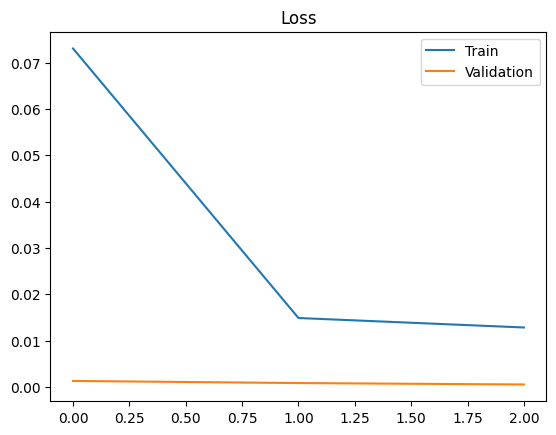

In [12]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

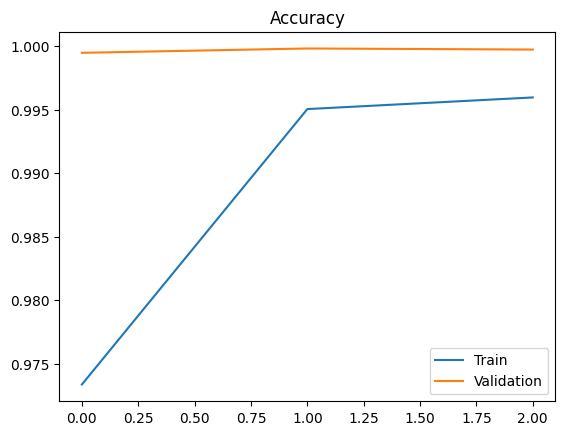

In [13]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(ds_test)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

195/195 [==============================] - 21s 103ms/step - loss: 0.0515 - accuracy: 0.9920
The test loss is:  0.05147267132997513
The best accuracy is:  99.19820427894592


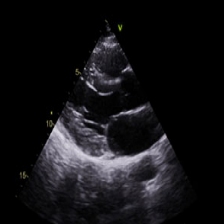

In [15]:
img = tf.keras.preprocessing.image.load_img('/kaggle/input/platest/Screenshot 2023-11-30 002144.png', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [16]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[7.4542607e-29 1.0000000e+00]]


In [17]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [18]:
# transform classes number into classes name
class_names[class_id.item()]

'PLA'

In [19]:
model.save('/kaggle/working/my_model')

In [20]:
model.save('saved_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
model2 = tf.keras.models.load_model('/kaggle/working/my_model')

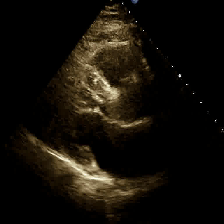

In [22]:
img2 = tf.keras.preprocessing.image.load_img('/kaggle/input/mitral-valve-phantom-troupe-must/MitralValveCarpentier/Test/NL/PLA/NL_Test/image_00025.jpg', target_size=(224, 224))
img2array = tf.keras.preprocessing.image.img_to_array(img2)
img2array = np.array([img2array]) 
img2

In [23]:
predictions2 = model2.predict(img2array)

1/1 [==============================] - 2s 2s/step


In [24]:
# generate argmax for predictions
class_id2 = np.argmax(predictions2, axis = 1)
print(class_id2)

[1]


In [25]:
# transform classes number into classes name
class_names[class_id2.item()]

'PLA'

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true = []
y_pred = []

for x_batch, y_batch in ds_test:
    predictions = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

#Calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

1/1 [==============================] - 0s 31ms/step
Precision: 0.9921
Recall: 0.9920
F1 Score: 0.9920


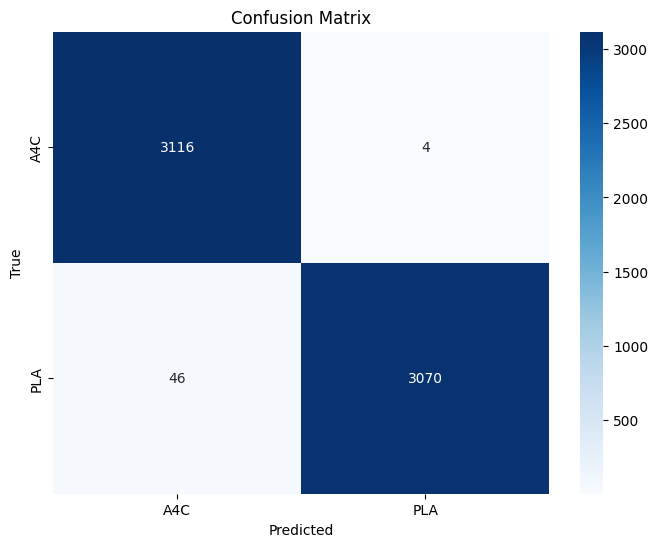

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

#Define class labels (assuming 4 classes)
class_labels = ['A4C', 'PLA'] 

#Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

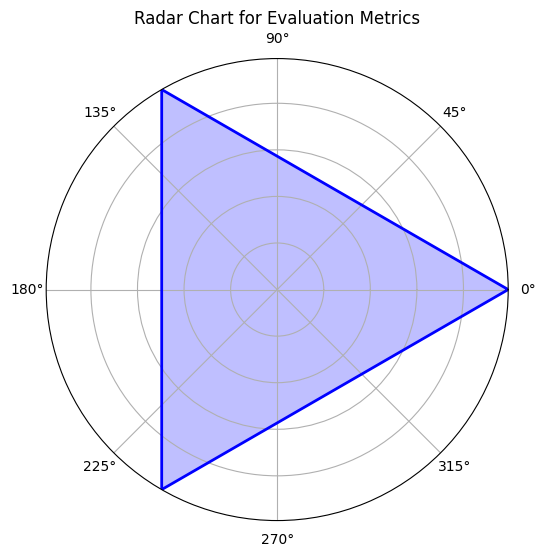

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are defined as in your code snippet

# Calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Create a radar chart
labels = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start to the end.
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])
plt.title('Radar Chart for Evaluation Metrics')
plt.show()
